<a href="https://colab.research.google.com/github/dkbean/expressjs/blob/master/300_WGAN_GP_Cat(Calculate_FID).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytorch-fid

In [ ]:
!pip uninstall tensorflow -y


Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Successfully uninstalled tensorflow-2.14.0


In [ ]:
!pip install  tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 111.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 65.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing

In [ ]:
!mkdir generator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
import numpy as np

import os

In [ ]:
#Create folders to save 3000 generated images for each n epochs
import os
import subprocess

n=20
# Specify the base folder where you want to create the subfolders
base_folder = ""  # Replace with your desired base folder path


# Create 15 folders with the specified naming pattern
for x in range(0, 3001, n):
    folder_name = f'catGenerated_wgan_{x}epochs'
    folder_path = os.path.join(base_folder, folder_name)

    try:
        os.makedirs(folder_path)
        print(f"Created folder: {folder_path}")
    except FileExistsError:
        print(f"Folder already exists: {folder_path}")

print("Folders created successfully.")

Created folder: catGenerated_wgan_0epochs
Created folder: catGenerated_wgan_20epochs
Created folder: catGenerated_wgan_40epochs
Created folder: catGenerated_wgan_60epochs
Created folder: catGenerated_wgan_80epochs
Created folder: catGenerated_wgan_100epochs
Created folder: catGenerated_wgan_120epochs
Created folder: catGenerated_wgan_140epochs
Created folder: catGenerated_wgan_160epochs
Created folder: catGenerated_wgan_180epochs
Created folder: catGenerated_wgan_200epochs
Created folder: catGenerated_wgan_220epochs
Created folder: catGenerated_wgan_240epochs
Created folder: catGenerated_wgan_260epochs
Created folder: catGenerated_wgan_280epochs
Created folder: catGenerated_wgan_300epochs
Created folder: catGenerated_wgan_320epochs
Created folder: catGenerated_wgan_340epochs
Created folder: catGenerated_wgan_360epochs
Created folder: catGenerated_wgan_380epochs
Created folder: catGenerated_wgan_400epochs
Created folder: catGenerated_wgan_420epochs
Created folder: catGenerated_wgan_440e

In [ ]:
!unzip /content/drive/MyDrive/cats_valid.zip -d ./

Archive:  /content/drive/MyDrive/cats_valid.zip
   creating: ./cats_valid/
  inflating: ./cats_valid/1.jpg      
  inflating: ./cats_valid/10.jpg     
  inflating: ./cats_valid/100.jpg    
  inflating: ./cats_valid/1000.jpg   
  inflating: ./cats_valid/1001.jpg   
  inflating: ./cats_valid/1002.jpg   
  inflating: ./cats_valid/1003.jpg   
  inflating: ./cats_valid/1004.jpg   
  inflating: ./cats_valid/1005.jpg   
  inflating: ./cats_valid/1006.jpg   
  inflating: ./cats_valid/1007.jpg   
  inflating: ./cats_valid/1008.jpg   
  inflating: ./cats_valid/1009.jpg   
  inflating: ./cats_valid/101.jpg    
  inflating: ./cats_valid/1010.jpg   
  inflating: ./cats_valid/1011.jpg   
  inflating: ./cats_valid/1012.jpg   
  inflating: ./cats_valid/1013.jpg   
  inflating: ./cats_valid/1014.jpg   
  inflating: ./cats_valid/1015.jpg   
  inflating: ./cats_valid/1016.jpg   
  inflating: ./cats_valid/1017.jpg   
  inflating: ./cats_valid/1018.jpg   
  inflating: ./cats_valid/1019.jpg   
  inflating: 

In [ ]:
!unzip /content/drive/MyDrive/cats_train.zip -d ./

Streaming output truncated to the last 5000 lines.
  inflating: ./cats_train/5000.jpg   
  inflating: ./cats_train/5001.jpg   
  inflating: ./cats_train/5002.jpg   
  inflating: ./cats_train/5003.jpg   
  inflating: ./cats_train/5004.jpg   
  inflating: ./cats_train/5005.jpg   
  inflating: ./cats_train/5006.jpg   
  inflating: ./cats_train/5007.jpg   
  inflating: ./cats_train/5008.jpg   
  inflating: ./cats_train/5009.jpg   
  inflating: ./cats_train/5010.jpg   
  inflating: ./cats_train/5011.jpg   
  inflating: ./cats_train/5012.jpg   
  inflating: ./cats_train/5013.jpg   
  inflating: ./cats_train/5014.jpg   
  inflating: ./cats_train/5015.jpg   
  inflating: ./cats_train/5016.jpg   
  inflating: ./cats_train/5017.jpg   
  inflating: ./cats_train/5018.jpg   
  inflating: ./cats_train/5019.jpg   
  inflating: ./cats_train/5020.jpg   
  inflating: ./cats_train/5021.jpg   
  inflating: ./cats_train/5022.jpg   
  inflating: ./cats_train/5023.jpg   
  inflating: ./cats_train/5024.jpg   

In [ ]:
! pwd


/content


In [ ]:
print(tf.version.VERSION)

2.8.0


In [ ]:
cat_data_dir = "/content/cats_train"

In [ ]:
FID_scores = []
def lastWord(string): # get the FID score from the FID command's result

    # split by space and converting
    # string to list and
    lis = list(string.split(" "))

    # length of list
    length = len(lis)

    # returning last element in list
    return lis[length-1]

In [ ]:
train_images = tf.keras.utils.image_dataset_from_directory(
    cat_data_dir, label_mode=None, image_size=(64, 64), batch_size=256 # Margaret: increase batch size from 32
)

Found 12747 files belonging to 1 classes.


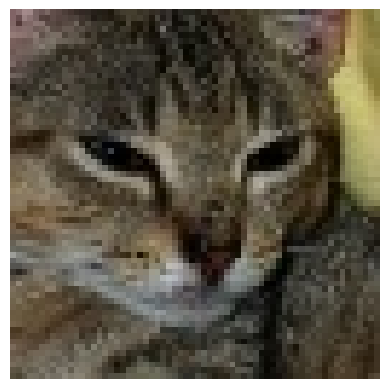

In [ ]:
image_batch = next(iter(train_images))
random_index = np.random.choice(image_batch.shape[0])
random_image = image_batch[random_index].numpy().astype("int32")

# Visualize 1 random image from the training dataset
plt.axis("off")
plt.imshow(random_image)
plt.show()

In [ ]:
def show(images):
    plt.figure(figsize=(4, 4))

    for i in range(16):
        plt.subplot(4, 4, i+1)
        img = keras.utils.array_to_img(images[i])
        plt.imshow(img)
        plt.axis('off')
    plt.show()

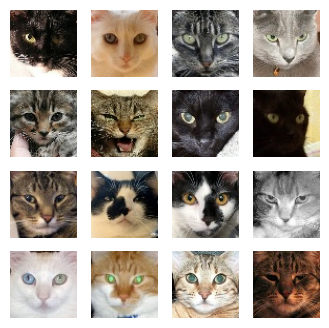

In [ ]:
# Visualize 16 images from the training dataset
show(image_batch[:16])

In [ ]:
# Normalize the images to [-1, 1] which is the range of the tanh activation
train_images = train_images.map(lambda x: (x - 127.5) / 127.5)

In [ ]:
# latent dimension of the random noise
LATENT_DIM = 128
# weight initializer for G per DCGAN paper
WEIGHT_INIT = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
# number of channels, 1 for gray scale and 3 for color images
CHANNELS = 3

In [ ]:
def build_generator():
    # create a Keras Sequential model
    model = Sequential(name="generator")

    # prepare for reshape: FC => BN => RN layers, note: input shape defined in the 1st Dense layer
    model.add(layers.Dense(8 * 8 * 512, input_dim=LATENT_DIM))
    # model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    # layers.LeakyReLU(alpha=0.2),

    # 1D => 3D: reshape the output of the previous layer
    model.add(layers.Reshape((8, 8, 512)))

    # upsample to 16x16: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(256, (4, 4),
                                     strides=(2, 2),
                                     padding="same",
                                     use_bias=False,
                                     kernel_initializer=WEIGHT_INIT))
    model.add(layers.BatchNormalization())
    model.add((layers.ReLU()))

    # upsample to 32x32: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(128, (4, 4),
                                     strides=(2, 2),
                                     padding="same",
                                     use_bias=False,
                                     kernel_initializer=WEIGHT_INIT))
    model.add(layers.BatchNormalization())
    model.add((layers.ReLU()))

    # upsample to 64x64: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(64, (4, 4),
                                     strides=(2, 2),
                                     padding="same",
                                     use_bias=False,
                                     kernel_initializer=WEIGHT_INIT))
    model.add(layers.BatchNormalization())
    model.add((layers.ReLU()))

    # final layer: Conv2D with tanh activation
    model.add(layers.Conv2D(CHANNELS, (4, 4), padding="same", activation="tanh"))

    # return the generator model
    return model

In [ ]:
# build the generator model
generator = build_generator()

In [ ]:
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32768)             4227072   
                                                                 
 re_lu (ReLU)                (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 256)      2097152   
 nspose)                                                         
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 256)      1024      
 ormalization)                                                   
                                                                 
 re_lu_1 (ReLU)              (None, 16, 16, 256)       0 

In [ ]:
def build_critic(height, width, depth, alpha=0.2):
    # Weight clipping to [-1, 1] to enfoce 1-Lipschitz constraint
    # constraint = WeightClip(0.01) # UPDATE for WGAN-GP: remove weight clipping

    # create a Keras Sequential model
    model = Sequential(name="critic")
    input_shape = (height, width, depth)

    # 1. first set of CONV => BN => leaky ReLU layers
    model.add(layers.Conv2D(64, (4, 4),
                            padding="same",
                            strides=(2, 2),
                            # kernel_constraint = constraint, # UPDATE for WGAN-GP: remove weight clipping
                            input_shape=input_shape))
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))

    # 2. second set of CONV => BN => leacy ReLU layers
    model.add(layers.Conv2D(128, (4, 4),
                            padding="same",
                            strides=(2, 2)))
                            # kernel_constraint = constraint,)) # UPDATE for WGAN-GP: remove weight clipping
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))

    # 3. third set of CONV => BN => leacy ReLU layers
    model.add(layers.Conv2D(128, (4, 4),
                            padding="same",
                            strides=(2, 2)))
                            # kernel_constraint = constraint,)) # UPDATE for WGAN-GP: remove weight clipping
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))

    # flatten and apply dropout
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))

    # linear activation in the last layer
    # Note: Keras `Dense` layer by default is already a `linear` activation
    model.add(layers.Dense(1, activation="linear"))

    # return the critic model
    return model

In [ ]:
# build the critic model
critic = build_critic(64, 64, 3)

In [ ]:
critic.summary()

Model: "critic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         262272    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)              0    

In [ ]:
class WGAN_GP(keras.Model):
    def __init__(self,
                 critic,
                 generator,
                 latent_dim,
                 critic_extra_steps,
                 gp_weight=10.0): # UPDATE for WGAN-GP: gradient penalty weight
        super().__init__()
        self.critic = critic
        self.generator = generator
        self.latent_dim = latent_dim
        self.c_extra_steps = critic_extra_steps
        self.gp_weight = gp_weight # WGAN-GP
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")


    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super(WGAN_GP, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    # UPDATE for WGAN-GP: use gradient penalty instead of weight clipping
    def gradient_penalty(self, batch_size, real_images, fake_images):
        """ Calculates the gradient penalty.

        Gradient penalty is calculated on an interpolated image
        and added to the discriminator loss.
        """

        alpha = tf.random.normal([batch_size, 1, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        # 1. Create the interpolated image
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 2. Get the Critic's output for the interpolated image
            pred = self.critic(interpolated, training=True)

        # 3. Calculate the gradients w.r.t to the interpolated image
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 4. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        # 5. Calculate gradient penalty
        gradient_penalty = tf.reduce_mean((norm - 1.0) ** 2)
        return gradient_penalty

    def train_step(self, real_images):

        batch_size = tf.shape(real_images)[0]
        noise = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Train the critic more often than the generator by 5 times (self.c_extra_steps)
        for i in range(self.c_extra_steps):
            # Step 1. Train the critic with both real images and fake images
            with tf.GradientTape() as tape:
                pred_real = self.critic(real_images, training=True)
                fake_images = self.generator(noise, training=True)
                pred_fake = self.critic(fake_images, training=True)
                # UPDATE for WGAN-GP: Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, real_images, fake_images)
                # UPDATE for WGAN-GP: Add gradient penalty to the original critic loss
                d_loss = self.d_loss_fn(pred_real, pred_fake) + gp * self.gp_weight
            # Compute critic gradients
            grads = tape.gradient(d_loss, self.critic.trainable_variables)
            # Update critic weights
            self.d_optimizer.apply_gradients(zip(grads, self.critic.trainable_variables))

        # Step 2. Train the generator (do not update weights of the critic)
        misleading_labels = tf.ones((batch_size, 1)) # G wants D to think the fake images are real (label as 1)

        with tf.GradientTape() as tape:
            fake_images = self.generator(noise, training=True)
            pred_fake = self.critic(fake_images, training=True)
            g_loss = self.g_loss_fn(pred_fake)
        # Compute generator gradients
        grads = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update generator wieghts
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=100):
        self.num_img = num_img
        self.latent_dim = latent_dim

        # Create random noise seed for visualization during traing
        self.seed = tf.random.normal([16, latent_dim])

    def on_epoch_end(self, epoch, logs=None):
        generated_images = self.model.generator(self.seed)
        generated_images = (generated_images * 127.5) + 127.5
        generated_images.numpy()

        if epoch % n == 0:
          fig = plt.figure(figsize=(4, 4))
          for i in range(self.num_img):
              plt.subplot(4, 4, i+1)
              img = keras.utils.array_to_img(generated_images[i])
              plt.imshow(img)
              plt.axis('off')
          plt.savefig('epoch_{:03d}.png'.format(epoch))
          plt.show()

        # calculate FID for each n epochs
        epoch_num = epoch
        if epoch % n == 0:
          folder_name = "catGenerated_wgan_" + str(epoch_num) + "epochs"
          print(folder_name)

          noise_size = 128
          seed = tf.random.normal([3001, noise_size])
          generated_images = self.model.generator(seed)
          generated_images = (generated_images * 127.5) + 127.5
          generated_images.numpy()

          # fig = plt.figure(figsize=(4, 4))
          for i in range(1,3001):
              img = keras.utils.array_to_img(generated_images[i])
              img.save(folder_name + "/cat_%d.jpg" % (i))

          self.model.generator.save('generator/generator'+ str(epoch_num) +'.h5')

          # Construct the command to run
          cmd = f"python -m pytorch_fid /content/cats_valid /content/{folder_name}"

          # Print the captured output
          try:
            output = subprocess.check_output(cmd, shell=True, text=True)
            print(f"Output of the calculating FID command:\n{output}")
            fid_val = float(lastWord(output))
            FID_scores.append(fid_val)
            print("FID_scores: ",FID_scores)
            # Display the current plot
            if len(FID_scores) > 10:  # only display when the FID_scores size > 10
              # Create sample data
              epochs = np.arange(0, len(FID_scores)*10, 10)  # Values from 0 with a step of 10
              fid_scores = np.array(FID_scores)
              print(fid_scores)
              # Find the minimum FID score and its corresponding epoch
              min_fid_score = min(fid_scores)
              min_fid_epoch = epochs[fid_scores.argmin()]
              # Create the plot
              plt.figure(figsize=(8, 6))
              plt.plot(epochs, fid_scores, marker='o', linestyle='-')
              plt.title('FID Score Over Epochs')
              plt.xlabel('Epoch num')
              plt.ylabel('FID score')
              plt.grid(True)
              # Annotate the minimum point with a rotated text and a straight arrow
              arrow_props = dict(arrowstyle='->', connectionstyle='arc3,rad=1')
              plt.annotate(f'Min FID Score: {min_fid_score:.2f}', xy=(min_fid_epoch, min_fid_score), xytext=(min_fid_epoch + 20, min_fid_score + 10.1),
                          arrowprops=arrow_props, rotation=0, va='bottom')
              # Highlight the minimum point with a red dot
              plt.scatter(min_fid_epoch, min_fid_score, color='red', s=100, label='Min FID Score')
              # Display the plot
              plt.show()

          except subprocess.CalledProcessError as e:
            # Handle any errors that may occur during command execution
            print(f"Error running command: {e}")


    def on_train_end(self, logs=None):
        self.model.generator.save('generator.h5')

In [ ]:
wgan_gp = WGAN_GP(critic=critic,
              generator=generator,
              latent_dim=LATENT_DIM,
              critic_extra_steps=5)

In [ ]:
# Wasserstein loss for the critic
def d_wasserstein_loss(pred_real, pred_fake):
    real_loss = tf.reduce_mean(pred_real)
    fake_loss = tf.reduce_mean(pred_fake)
    return fake_loss - real_loss

# Wasserstein loss for the generator
def g_wasserstein_loss(pred_fake):
    return -tf.reduce_mean(pred_fake)

In [ ]:
LR = 0.000200 # WGAN-GP paper recommends lr of 0.0002
d_optimizer = keras.optimizers.Adam(learning_rate=LR, beta_1=0.5, beta_2=0.9) # UPDATE for WGAN-GP: use Adam instead of RMSProp # Changed from 0.0002-> 0.0001
g_optimizer = keras.optimizers.Adam(learning_rate=LR, beta_1=0.5, beta_2=0.9) # UPDATE for WGAN-GP: use Adam instead of RMSProp

In [ ]:
wgan_gp.compile(
    d_optimizer=d_optimizer,
    g_optimizer=g_optimizer,
    d_loss_fn = d_wasserstein_loss,
    g_loss_fn = g_wasserstein_loss
)

Epoch 1/3002
50/50 [==============================] - ETA: 0s - d_loss: -69.3227 - g_loss: 81.6158

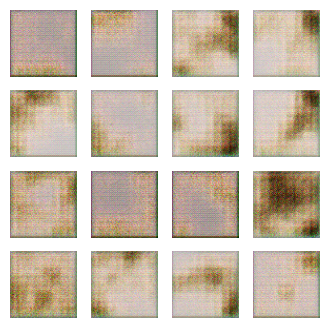

catGenerated_wgan_0epochs


Output of the calculating FID command:
FID:  263.25720127498886

FID_scores:  [263.25720127498886]
50/50 [==============================] - 61s 893ms/step - d_loss: -69.3227 - g_loss: 81.6158
Epoch 2/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -20.0562 - g_loss: -4.0851
Epoch 3/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -19.4085 - g_loss: -7.9516
Epoch 4/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -17.4544 - g_loss: -18.9677
Epoch 5/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -14.5729 - g_loss: -18.5065
Epoch 6/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -12.1454 - g_loss: -19.5880
Epoch 7/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -10.7488 - g_loss: -24.3666
Epoch 8/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -10.3421 - g_loss: -34.9871
Epoch 9/3002
50/50 [==============================] - 8s 157ms/step 

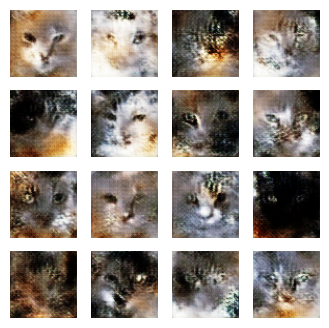

catGenerated_wgan_20epochs


Output of the calculating FID command:
FID:  197.97804295772073

FID_scores:  [263.25720127498886, 197.97804295772073]
50/50 [==============================] - 28s 557ms/step - d_loss: -6.2556 - g_loss: 30.9752
Epoch 22/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -5.8723 - g_loss: 24.9349
Epoch 23/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -6.0104 - g_loss: 15.6627
Epoch 24/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -6.0541 - g_loss: 17.5077
Epoch 25/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -6.3445 - g_loss: 24.0521
Epoch 26/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -5.7544 - g_loss: 33.8735
Epoch 27/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -5.7536 - g_loss: 31.1928
Epoch 28/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -5.4840 - g_loss: 31.4301
Epoch 29/3002
50/50 [==============================] -

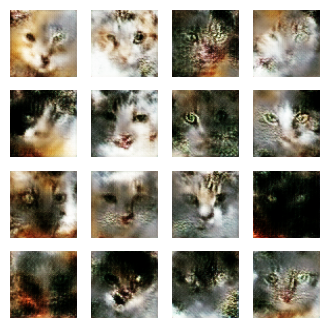

catGenerated_wgan_40epochs


Output of the calculating FID command:
FID:  158.62889696686187

FID_scores:  [263.25720127498886, 197.97804295772073, 158.62889696686187]
50/50 [==============================] - 28s 558ms/step - d_loss: -4.7858 - g_loss: -31.9560
Epoch 42/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -4.6939 - g_loss: -39.9569
Epoch 43/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -4.5404 - g_loss: -8.8763
Epoch 44/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -4.4119 - g_loss: -7.3050
Epoch 45/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -4.4012 - g_loss: -0.2836
Epoch 46/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -4.3414 - g_loss: 8.3135
Epoch 47/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -4.5627 - g_loss: 71.1882
Epoch 48/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -3.7726 - g_loss: -37.8524
Epoch 49/3002
50/50 [===========

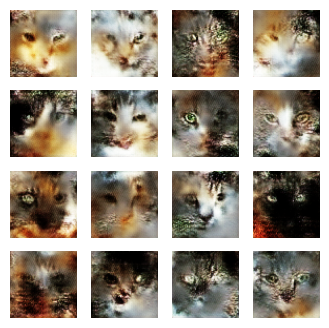

catGenerated_wgan_60epochs


Output of the calculating FID command:
FID:  146.24704789610453

FID_scores:  [263.25720127498886, 197.97804295772073, 158.62889696686187, 146.24704789610453]
50/50 [==============================] - 28s 574ms/step - d_loss: -3.7922 - g_loss: 135.7462
Epoch 62/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -4.4309 - g_loss: 150.6693
Epoch 63/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -3.0240 - g_loss: 154.0269
Epoch 64/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -3.5908 - g_loss: 136.2870
Epoch 65/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -3.7948 - g_loss: 135.5235
Epoch 66/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -3.8345 - g_loss: 114.9068
Epoch 67/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -3.3795 - g_loss: 122.0546
Epoch 68/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -3.0475 - g_loss: 140.8038
Epoch 

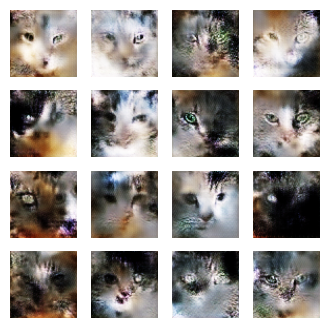

catGenerated_wgan_80epochs


Output of the calculating FID command:
FID:  157.34158460204333

FID_scores:  [263.25720127498886, 197.97804295772073, 158.62889696686187, 146.24704789610453, 157.34158460204333]
50/50 [==============================] - 29s 580ms/step - d_loss: -2.8501 - g_loss: 144.8074
Epoch 82/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -3.0118 - g_loss: 126.7948
Epoch 83/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -3.6545 - g_loss: 119.8056
Epoch 84/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.9152 - g_loss: 117.2226
Epoch 85/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -3.4026 - g_loss: 112.5176
Epoch 86/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -3.3092 - g_loss: 129.4449
Epoch 87/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.9995 - g_loss: 119.7998
Epoch 88/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -3.2527 - g_l

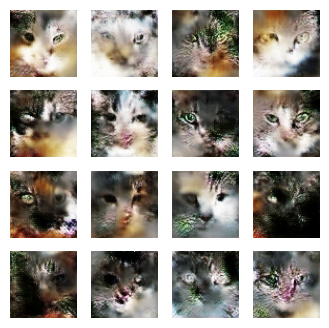

catGenerated_wgan_100epochs


Output of the calculating FID command:
FID:  153.12830692250424

FID_scores:  [263.25720127498886, 197.97804295772073, 158.62889696686187, 146.24704789610453, 157.34158460204333, 153.12830692250424]
50/50 [==============================] - 28s 562ms/step - d_loss: -3.8070 - g_loss: 122.7302
Epoch 102/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -2.5449 - g_loss: 134.2728
Epoch 103/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.8885 - g_loss: 96.6833
Epoch 104/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.8144 - g_loss: 65.9050
Epoch 105/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -3.0031 - g_loss: 56.3637
Epoch 106/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -4.0596 - g_loss: 39.2981
Epoch 107/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -2.1870 - g_loss: 51.3646
Epoch 108/3002
50/50 [==============================] - 8s 156ms/step -

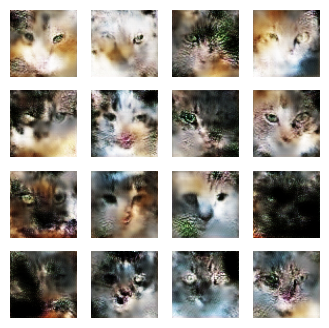

catGenerated_wgan_120epochs


Output of the calculating FID command:
FID:  154.14113904504006

FID_scores:  [263.25720127498886, 197.97804295772073, 158.62889696686187, 146.24704789610453, 157.34158460204333, 153.12830692250424, 154.14113904504006]
50/50 [==============================] - 27s 554ms/step - d_loss: -2.3831 - g_loss: 160.9056
Epoch 122/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -2.4992 - g_loss: 206.0287
Epoch 123/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -2.2193 - g_loss: 158.6647
Epoch 124/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.1674 - g_loss: 146.3589
Epoch 125/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.3776 - g_loss: 172.9743
Epoch 126/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.8147 - g_loss: 219.6511
Epoch 127/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.2077 - g_loss: 230.7744
Epoch 128/3002
50/50 [========================

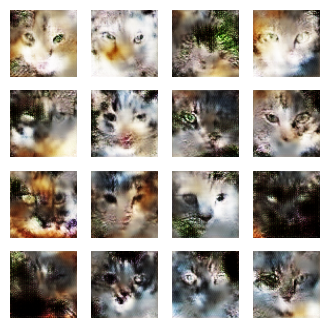

catGenerated_wgan_140epochs


Output of the calculating FID command:
FID:  159.43308042326726

FID_scores:  [263.25720127498886, 197.97804295772073, 158.62889696686187, 146.24704789610453, 157.34158460204333, 153.12830692250424, 154.14113904504006, 159.43308042326726]
50/50 [==============================] - 28s 560ms/step - d_loss: -1.5899 - g_loss: 120.1026
Epoch 142/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.6887 - g_loss: 162.7967
Epoch 143/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -2.2926 - g_loss: 211.5688
Epoch 144/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -2.5374 - g_loss: 182.4304
Epoch 145/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -2.7464 - g_loss: 160.4128
Epoch 146/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.4828 - g_loss: 225.3438
Epoch 147/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.1861 - g_loss: 157.5214
Epoch 148/3002
50/50 [====

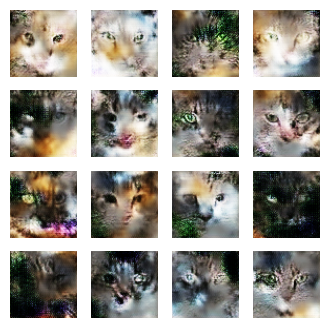

catGenerated_wgan_160epochs


Output of the calculating FID command:
FID:  152.44923800630812

FID_scores:  [263.25720127498886, 197.97804295772073, 158.62889696686187, 146.24704789610453, 157.34158460204333, 153.12830692250424, 154.14113904504006, 159.43308042326726, 152.44923800630812]
50/50 [==============================] - 27s 556ms/step - d_loss: -1.7695 - g_loss: 268.0309
Epoch 162/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.6783 - g_loss: 247.1985
Epoch 163/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.6777 - g_loss: 210.5258
Epoch 164/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.3840 - g_loss: 164.8767
Epoch 165/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.8233 - g_loss: 173.5460
Epoch 166/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -2.8000 - g_loss: 155.5742
Epoch 167/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.1725 - g_loss: 172.9248
Epoch 

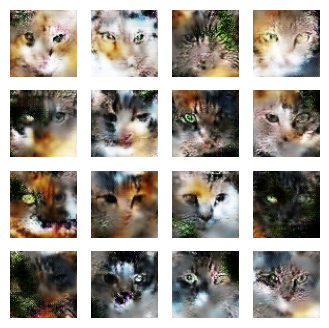

catGenerated_wgan_180epochs


Output of the calculating FID command:
FID:  152.45557136252563

FID_scores:  [263.25720127498886, 197.97804295772073, 158.62889696686187, 146.24704789610453, 157.34158460204333, 153.12830692250424, 154.14113904504006, 159.43308042326726, 152.44923800630812, 152.45557136252563]
50/50 [==============================] - 28s 571ms/step - d_loss: -2.3036 - g_loss: 159.9152
Epoch 182/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.8483 - g_loss: 157.5271
Epoch 183/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.6352 - g_loss: 163.8124
Epoch 184/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.9725 - g_loss: 138.9303
Epoch 185/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.9609 - g_loss: 134.9925
Epoch 186/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -1.9932 - g_loss: 182.4514
Epoch 187/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.9750 - g_l

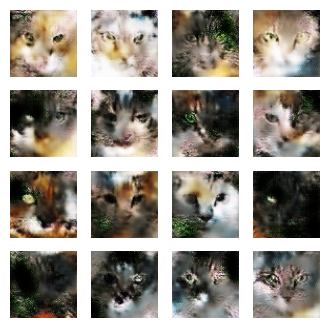

catGenerated_wgan_200epochs


Output of the calculating FID command:
FID:  160.92200950166904

FID_scores:  [263.25720127498886, 197.97804295772073, 158.62889696686187, 146.24704789610453, 157.34158460204333, 153.12830692250424, 154.14113904504006, 159.43308042326726, 152.44923800630812, 152.45557136252563, 160.92200950166904]
[263.25720127 197.97804296 158.62889697 146.2470479  157.3415846
 153.12830692 154.14113905 159.43308042 152.44923801 152.45557136
 160.9220095 ]


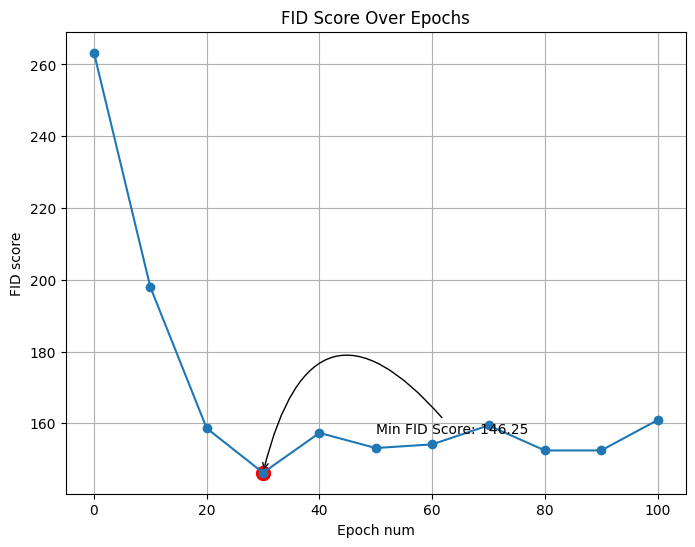

50/50 [==============================] - 29s 581ms/step - d_loss: -2.8973 - g_loss: 223.6037
Epoch 202/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.1703 - g_loss: 202.2967
Epoch 203/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -2.2865 - g_loss: 210.9572
Epoch 204/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.4321 - g_loss: 213.0107
Epoch 205/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.4491 - g_loss: 194.3529
Epoch 206/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -1.6418 - g_loss: 204.8164
Epoch 207/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -2.0837 - g_loss: 212.8648
Epoch 208/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.0285 - g_loss: 177.8598
Epoch 209/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.6722 - g_loss: 169.2253
Epoch 210/3002
50/50 [=============================

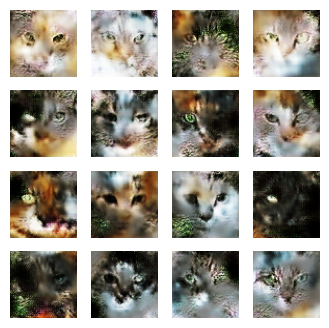

catGenerated_wgan_220epochs


Output of the calculating FID command:
FID:  147.55778022793064

FID_scores:  [263.25720127498886, 197.97804295772073, 158.62889696686187, 146.24704789610453, 157.34158460204333, 153.12830692250424, 154.14113904504006, 159.43308042326726, 152.44923800630812, 152.45557136252563, 160.92200950166904, 147.55778022793064]
[263.25720127 197.97804296 158.62889697 146.2470479  157.3415846
 153.12830692 154.14113905 159.43308042 152.44923801 152.45557136
 160.9220095  147.55778023]


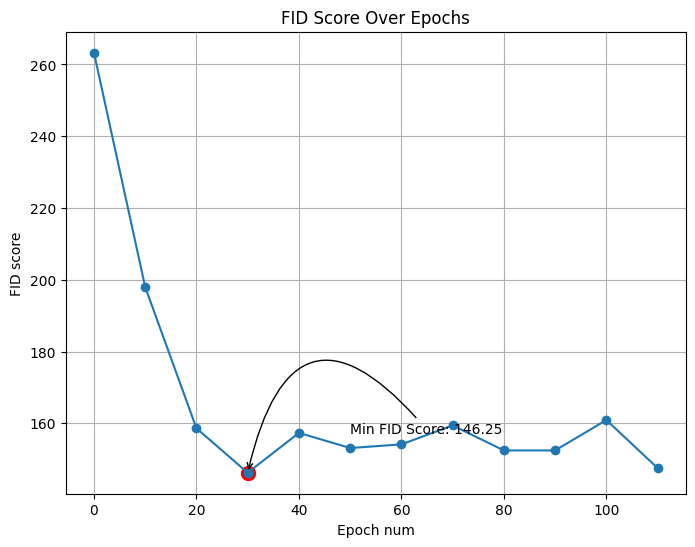

50/50 [==============================] - 28s 576ms/step - d_loss: -1.9997 - g_loss: 191.6720
Epoch 222/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.8085 - g_loss: 198.8822
Epoch 223/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -2.1073 - g_loss: 173.8216
Epoch 224/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.1920 - g_loss: 179.5839
Epoch 225/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.4822 - g_loss: 222.4082
Epoch 226/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -1.8113 - g_loss: 177.1021
Epoch 227/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.4505 - g_loss: 254.4462
Epoch 228/3002
50/50 [==============================] - 8s 157ms/step - d_loss: -1.5768 - g_loss: 266.1467
Epoch 229/3002
50/50 [==============================] - 8s 156ms/step - d_loss: -2.8103 - g_loss: 200.5614
Epoch 230/3002
50/50 [=============================

In [ ]:
NUM_EPOCHS = 3002 # number of epochs
wgan_gp.fit(train_images, epochs=NUM_EPOCHS, callbacks=[GANMonitor(num_img=16, latent_dim=LATENT_DIM)])

In [ ]:
!python -m pytorch_fid /content/cats_valid /content/catGenerated_wgan_0epochs

In [ ]:
!zip -r /content/drive/MyDrive/generator_22.zip /content/generator

In [ ]:
From 10:25
To
21.1 confirmed